In [1]:
from keras.applications import VGG19
conv_base = VGG19(weights='imagenet',                   
                       include_top=False,                   
                       input_shape=(50, 50, 3))

/Users/norikaisa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [3]:
import os 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator 
base_dir = '/Users/norikaisa/Downloads/OneDrive - Harvard University/Classify multifocal visual potential using convolutional neural network in patients with pituitary adenomas'
train_dir = os.path.join(base_dir, 'noisy') 

In [4]:
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 20 

def extract_features(directory, sample_count):     
    features = np.zeros(shape=(sample_count, 1, 1, 512))     
    labels = np.zeros(shape=(sample_count))     
    generator = datagen.flow_from_directory(         
        directory,         
        target_size=(50, 50),         
        batch_size=batch_size,         
        class_mode='binary')     
    i = 0     
    for inputs_batch, labels_batch in generator:         
        features_batch = conv_base.predict(inputs_batch)         
        features[i * batch_size : (i + 1) * batch_size] = features_batch         
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch         
        i += 1         
        if i * batch_size >= sample_count:             
            # Note that since generators yield data indefinitely in a loop,             
            # we must `breakàfter every image has been seen once.            
            break     
    return features, labels 

In [7]:
train_features, train_labels = extract_features(train_dir, 2204) 

Found 2204 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (2204, 1 * 1 * 512)) 

In [29]:
train_features_sample = np.concatenate([train_features[:999], train_features[1221:]], axis = 0)
train_labels_sample = np.concatenate([train_labels[:999], train_labels[1221:]], axis = 0)

In [30]:
train_features_sample.shape

(1982, 512)

In [ ]:
from keras import models 
from keras import layers 
from keras import optimizers 

model = models.Sequential() 
model.add(layers.Dense(256, activation='relu', input_dim=1 * 1 * 512)) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),               
              loss='binary_crossentropy',               
              metrics=['acc'])

history = model.fit(train_features_sample, train_labels_sample,                     
                    epochs=400,                     
                    batch_size=20,                     
                    validation_split=0.1111,
                    shuffle=True)

Train on 1761 samples, validate on 221 samples
Epoch 1/400
1761/1761 [==============================] - 1s 400us/step - loss: 0.7907 - acc: 0.4514 - val_loss: 0.6633 - val_acc: 0.6290
Epoch 2/400
1761/1761 [==============================] - 0s 168us/step - loss: 0.6948 - acc: 0.5815 - val_loss: 0.6774 - val_acc: 0.6290
Epoch 3/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.6894 - acc: 0.5945 - val_loss: 0.6752 - val_acc: 0.6290
Epoch 4/400
1761/1761 [==============================] - 0s 167us/step - loss: 0.6846 - acc: 0.5951 - val_loss: 0.6718 - val_acc: 0.6290
Epoch 5/400
1761/1761 [==============================] - 0s 168us/step - loss: 0.6778 - acc: 0.6042 - val_loss: 0.6739 - val_acc: 0.6290
Epoch 6/400
1761/1761 [==============================] - 0s 166us/step - loss: 0.6713 - acc: 0.6167 - val_loss: 0.6684 - val_acc: 0.6290
Epoch 7/400
1761/1761 [==============================] - 0s 162us/step - loss: 0.6775 - acc: 0.6014 - val_loss: 0.6699 - val_acc: 0

1761/1761 [==============================] - 0s 199us/step - loss: 0.6263 - acc: 0.6513 - val_loss: 0.6053 - val_acc: 0.6290
Epoch 61/400
1761/1761 [==============================] - 0s 189us/step - loss: 0.6241 - acc: 0.6485 - val_loss: 0.6024 - val_acc: 0.6380
Epoch 62/400
1761/1761 [==============================] - 0s 186us/step - loss: 0.6211 - acc: 0.6689 - val_loss: 0.6015 - val_acc: 0.6380
Epoch 63/400
1761/1761 [==============================] - 0s 174us/step - loss: 0.6143 - acc: 0.6735 - val_loss: 0.6005 - val_acc: 0.6380
Epoch 64/400
1761/1761 [==============================] - 0s 204us/step - loss: 0.6177 - acc: 0.6638 - val_loss: 0.6000 - val_acc: 0.6335
Epoch 65/400
1761/1761 [==============================] - 0s 189us/step - loss: 0.6217 - acc: 0.6633 - val_loss: 0.5981 - val_acc: 0.6380
Epoch 66/400
1761/1761 [==============================] - 0s 174us/step - loss: 0.6197 - acc: 0.6695 - val_loss: 0.5992 - val_acc: 0.6290
Epoch 67/400
1761/1761 [=======================

1761/1761 [==============================] - 0s 167us/step - loss: 0.5758 - acc: 0.7376 - val_loss: 0.5443 - val_acc: 0.7828
Epoch 120/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5763 - acc: 0.7257 - val_loss: 0.5434 - val_acc: 0.7919
Epoch 121/400
1761/1761 [==============================] - 0s 167us/step - loss: 0.5812 - acc: 0.7269 - val_loss: 0.5446 - val_acc: 0.7919
Epoch 122/400
1761/1761 [==============================] - 0s 178us/step - loss: 0.5762 - acc: 0.7263 - val_loss: 0.5434 - val_acc: 0.7964
Epoch 123/400
1761/1761 [==============================] - 0s 210us/step - loss: 0.5783 - acc: 0.7252 - val_loss: 0.5410 - val_acc: 0.7873
Epoch 124/400
1761/1761 [==============================] - 0s 203us/step - loss: 0.5795 - acc: 0.7217 - val_loss: 0.5417 - val_acc: 0.7873
Epoch 125/400
1761/1761 [==============================] - 0s 201us/step - loss: 0.5756 - acc: 0.7331 - val_loss: 0.5402 - val_acc: 0.7738
Epoch 126/400
1761/1761 [================

Epoch 178/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5509 - acc: 0.7428 - val_loss: 0.5094 - val_acc: 0.7919
Epoch 179/400
1761/1761 [==============================] - 0s 162us/step - loss: 0.5440 - acc: 0.7473 - val_loss: 0.5100 - val_acc: 0.7964
Epoch 180/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5455 - acc: 0.7490 - val_loss: 0.5086 - val_acc: 0.7873
Epoch 181/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5479 - acc: 0.7473 - val_loss: 0.5082 - val_acc: 0.7919
Epoch 182/400
1761/1761 [==============================] - 0s 166us/step - loss: 0.5509 - acc: 0.7473 - val_loss: 0.5077 - val_acc: 0.7919
Epoch 183/400
1761/1761 [==============================] - 0s 168us/step - loss: 0.5446 - acc: 0.7524 - val_loss: 0.5081 - val_acc: 0.7919
Epoch 184/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5417 - acc: 0.7490 - val_loss: 0.5068 - val_acc: 0.7919
Epoch 185/400
1761/1761 [==

Epoch 237/400
1761/1761 [==============================] - 0s 161us/step - loss: 0.5252 - acc: 0.7587 - val_loss: 0.4925 - val_acc: 0.8100
Epoch 238/400
1761/1761 [==============================] - 0s 162us/step - loss: 0.5296 - acc: 0.7626 - val_loss: 0.4915 - val_acc: 0.8054
Epoch 239/400
1761/1761 [==============================] - 0s 161us/step - loss: 0.5224 - acc: 0.7649 - val_loss: 0.4933 - val_acc: 0.8100
Epoch 240/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5272 - acc: 0.7553 - val_loss: 0.4930 - val_acc: 0.8054
Epoch 241/400
1761/1761 [==============================] - 0s 164us/step - loss: 0.5255 - acc: 0.7530 - val_loss: 0.4907 - val_acc: 0.8100
Epoch 242/400
1761/1761 [==============================] - 0s 163us/step - loss: 0.5282 - acc: 0.7587 - val_loss: 0.4908 - val_acc: 0.8009
Epoch 243/400
1761/1761 [==============================] - 0s 160us/step - loss: 0.5231 - acc: 0.7570 - val_loss: 0.4909 - val_acc: 0.8145
Epoch 244/400
1020/1761 [==

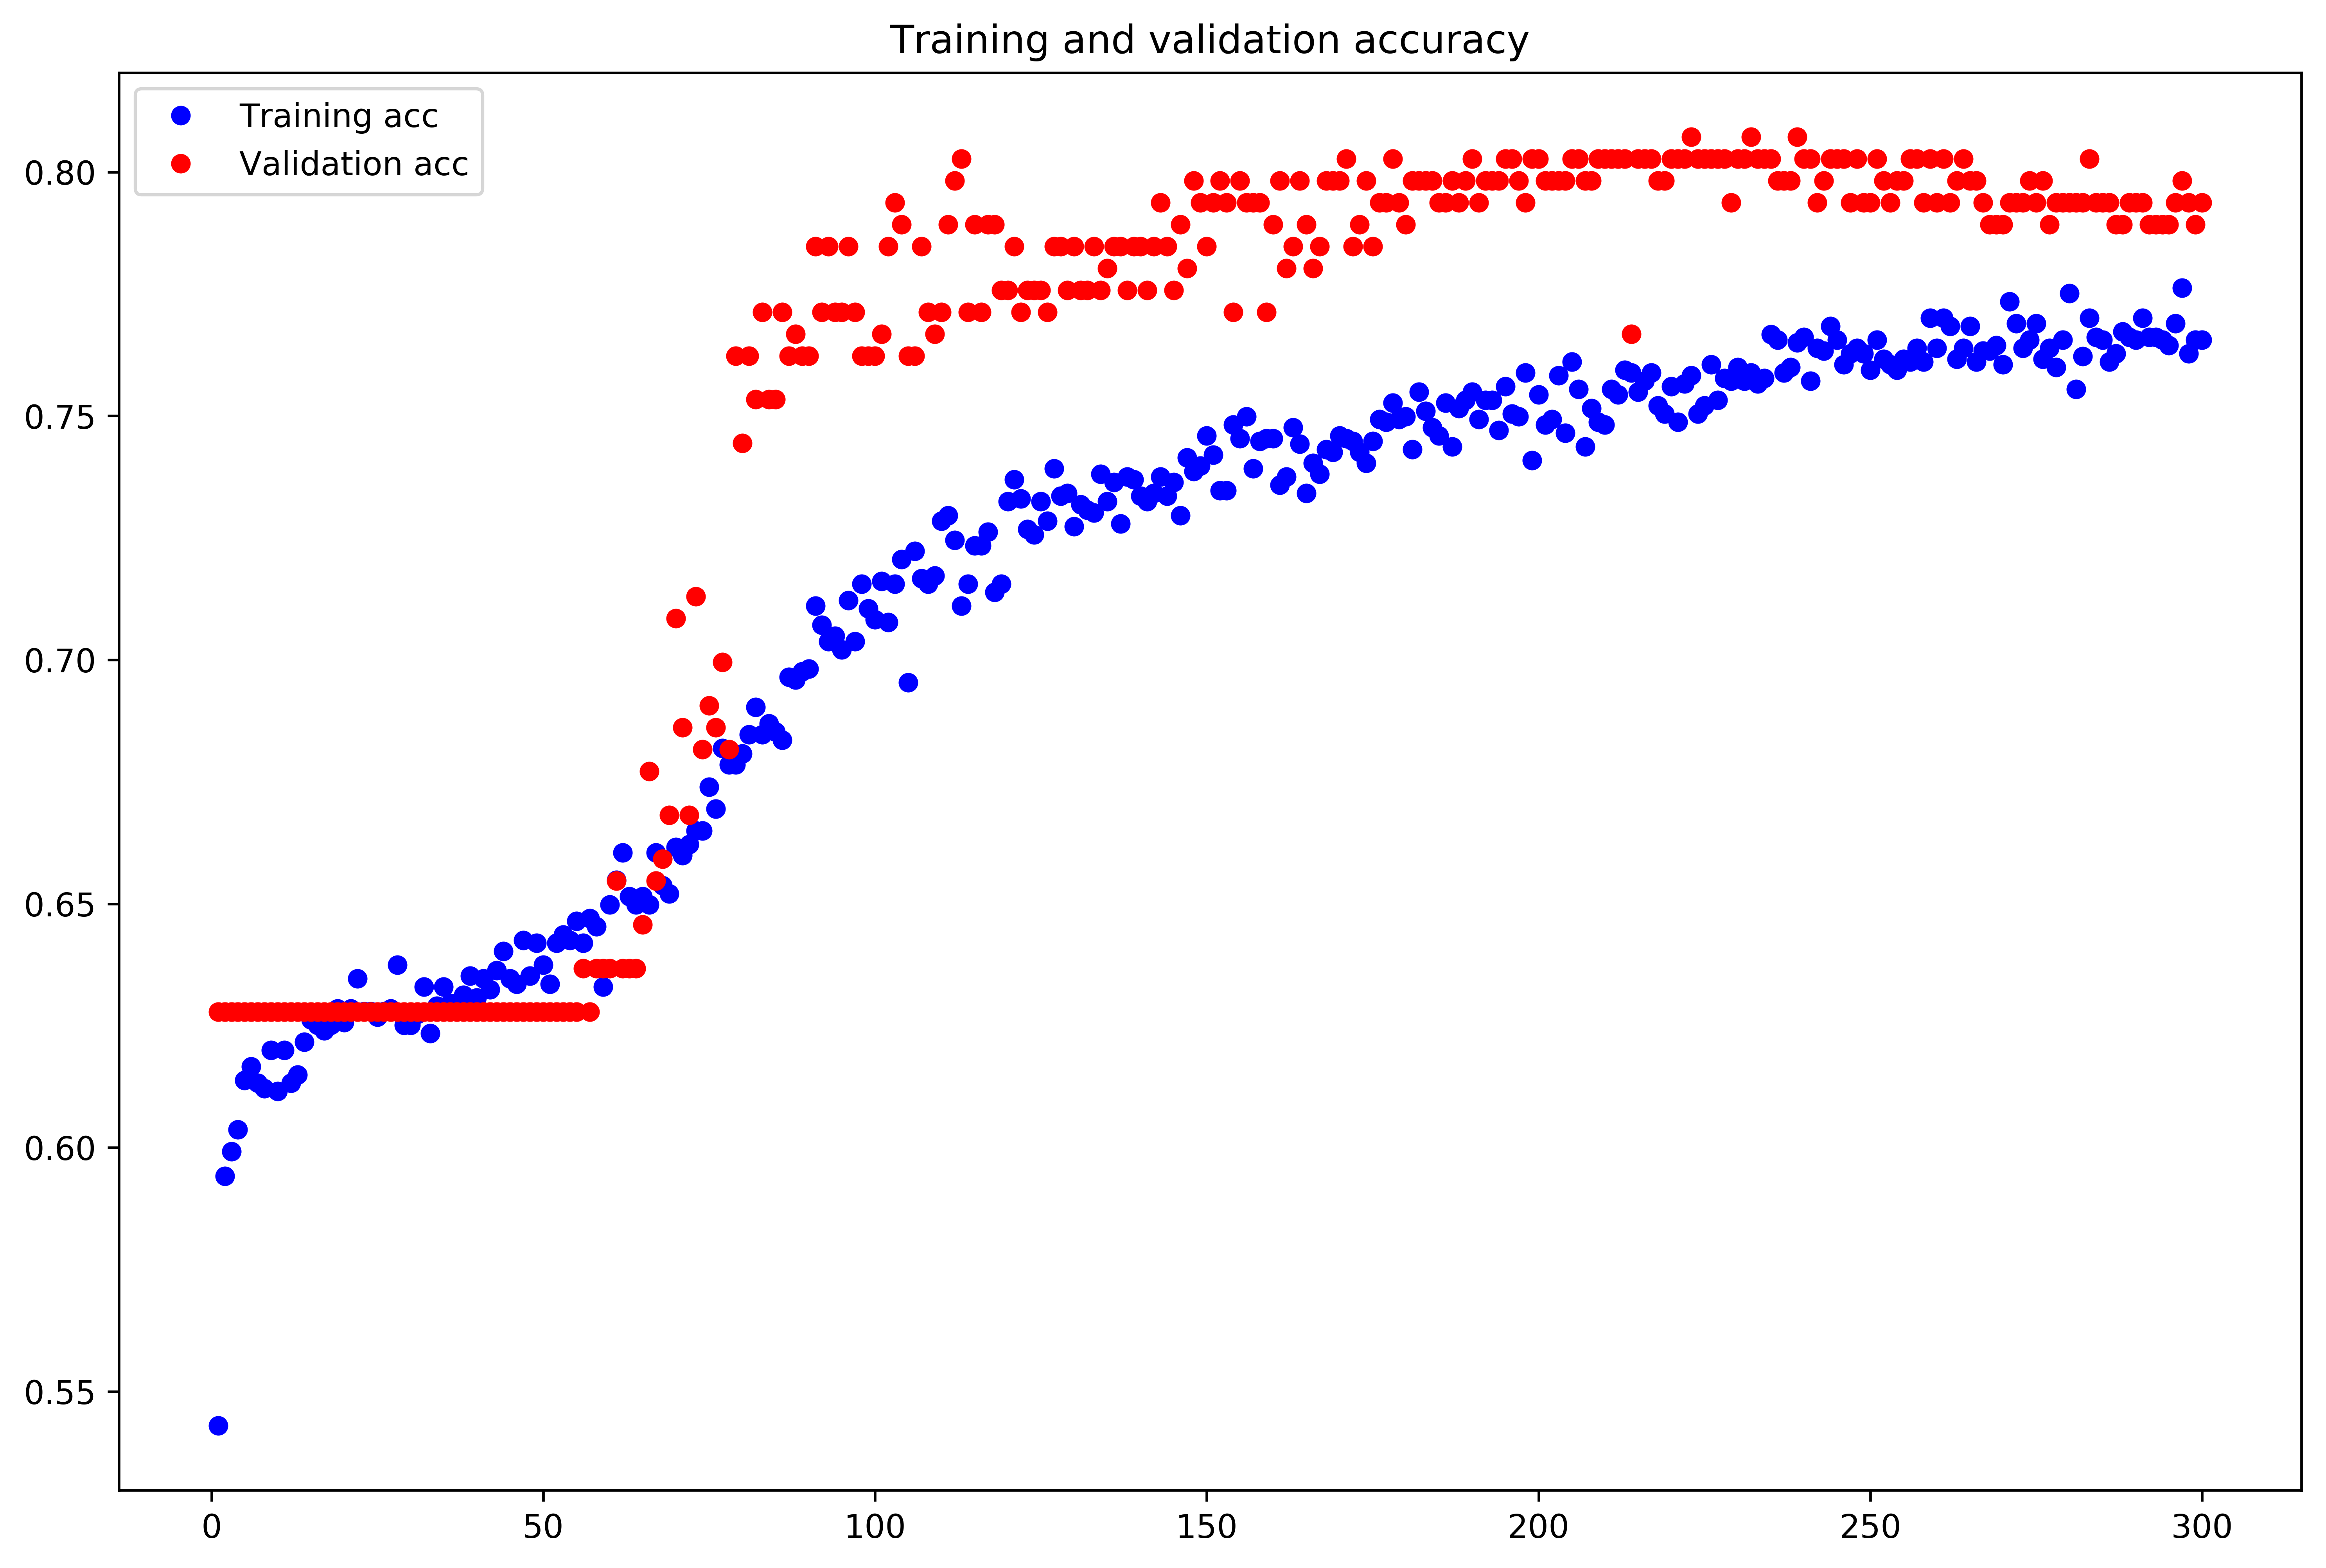

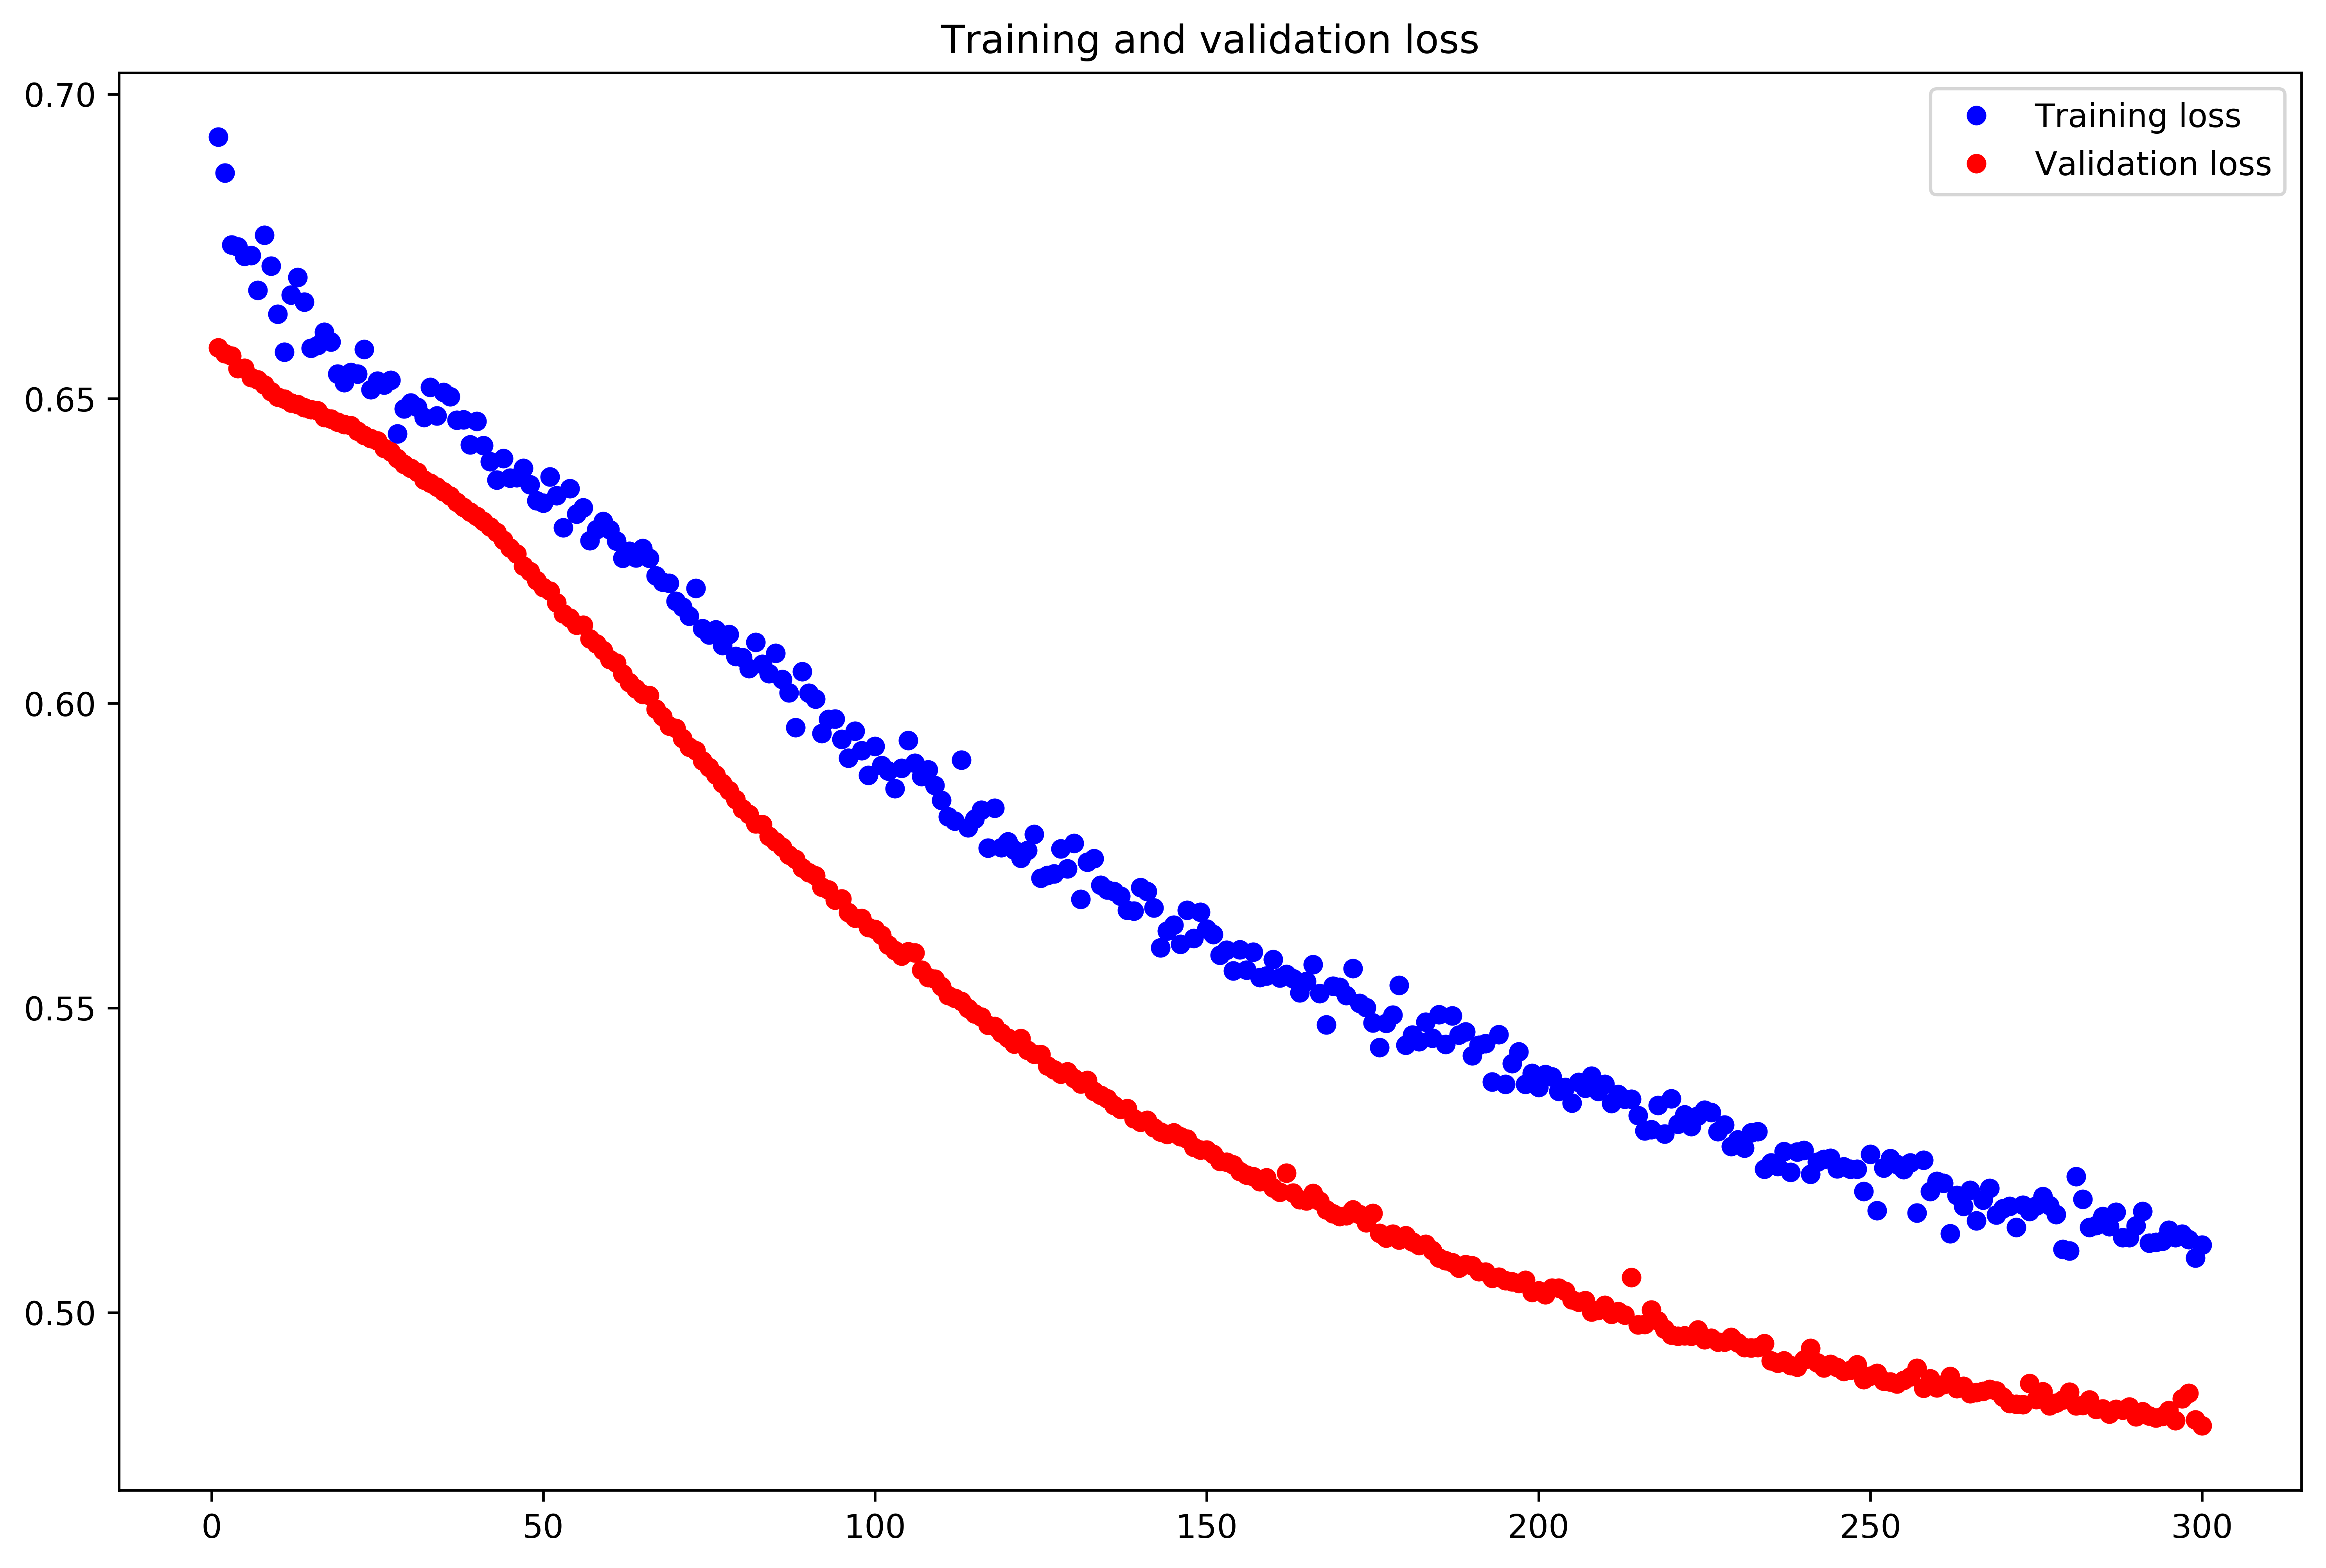

In [25]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8), dpi = 600)
plt.plot(epochs, acc, 'bo', label='Training acc', markersize=5) 
plt.plot(epochs, val_acc, 'ro', label='Validation acc', markersize=5) 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure() 
plt.figure(figsize=(12,8), dpi = 600)
plt.plot(epochs, loss, 'bo', label='Training loss', markersize=5) 
plt.plot(epochs, val_loss, 'ro', label='Validation loss', markersize=5) 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

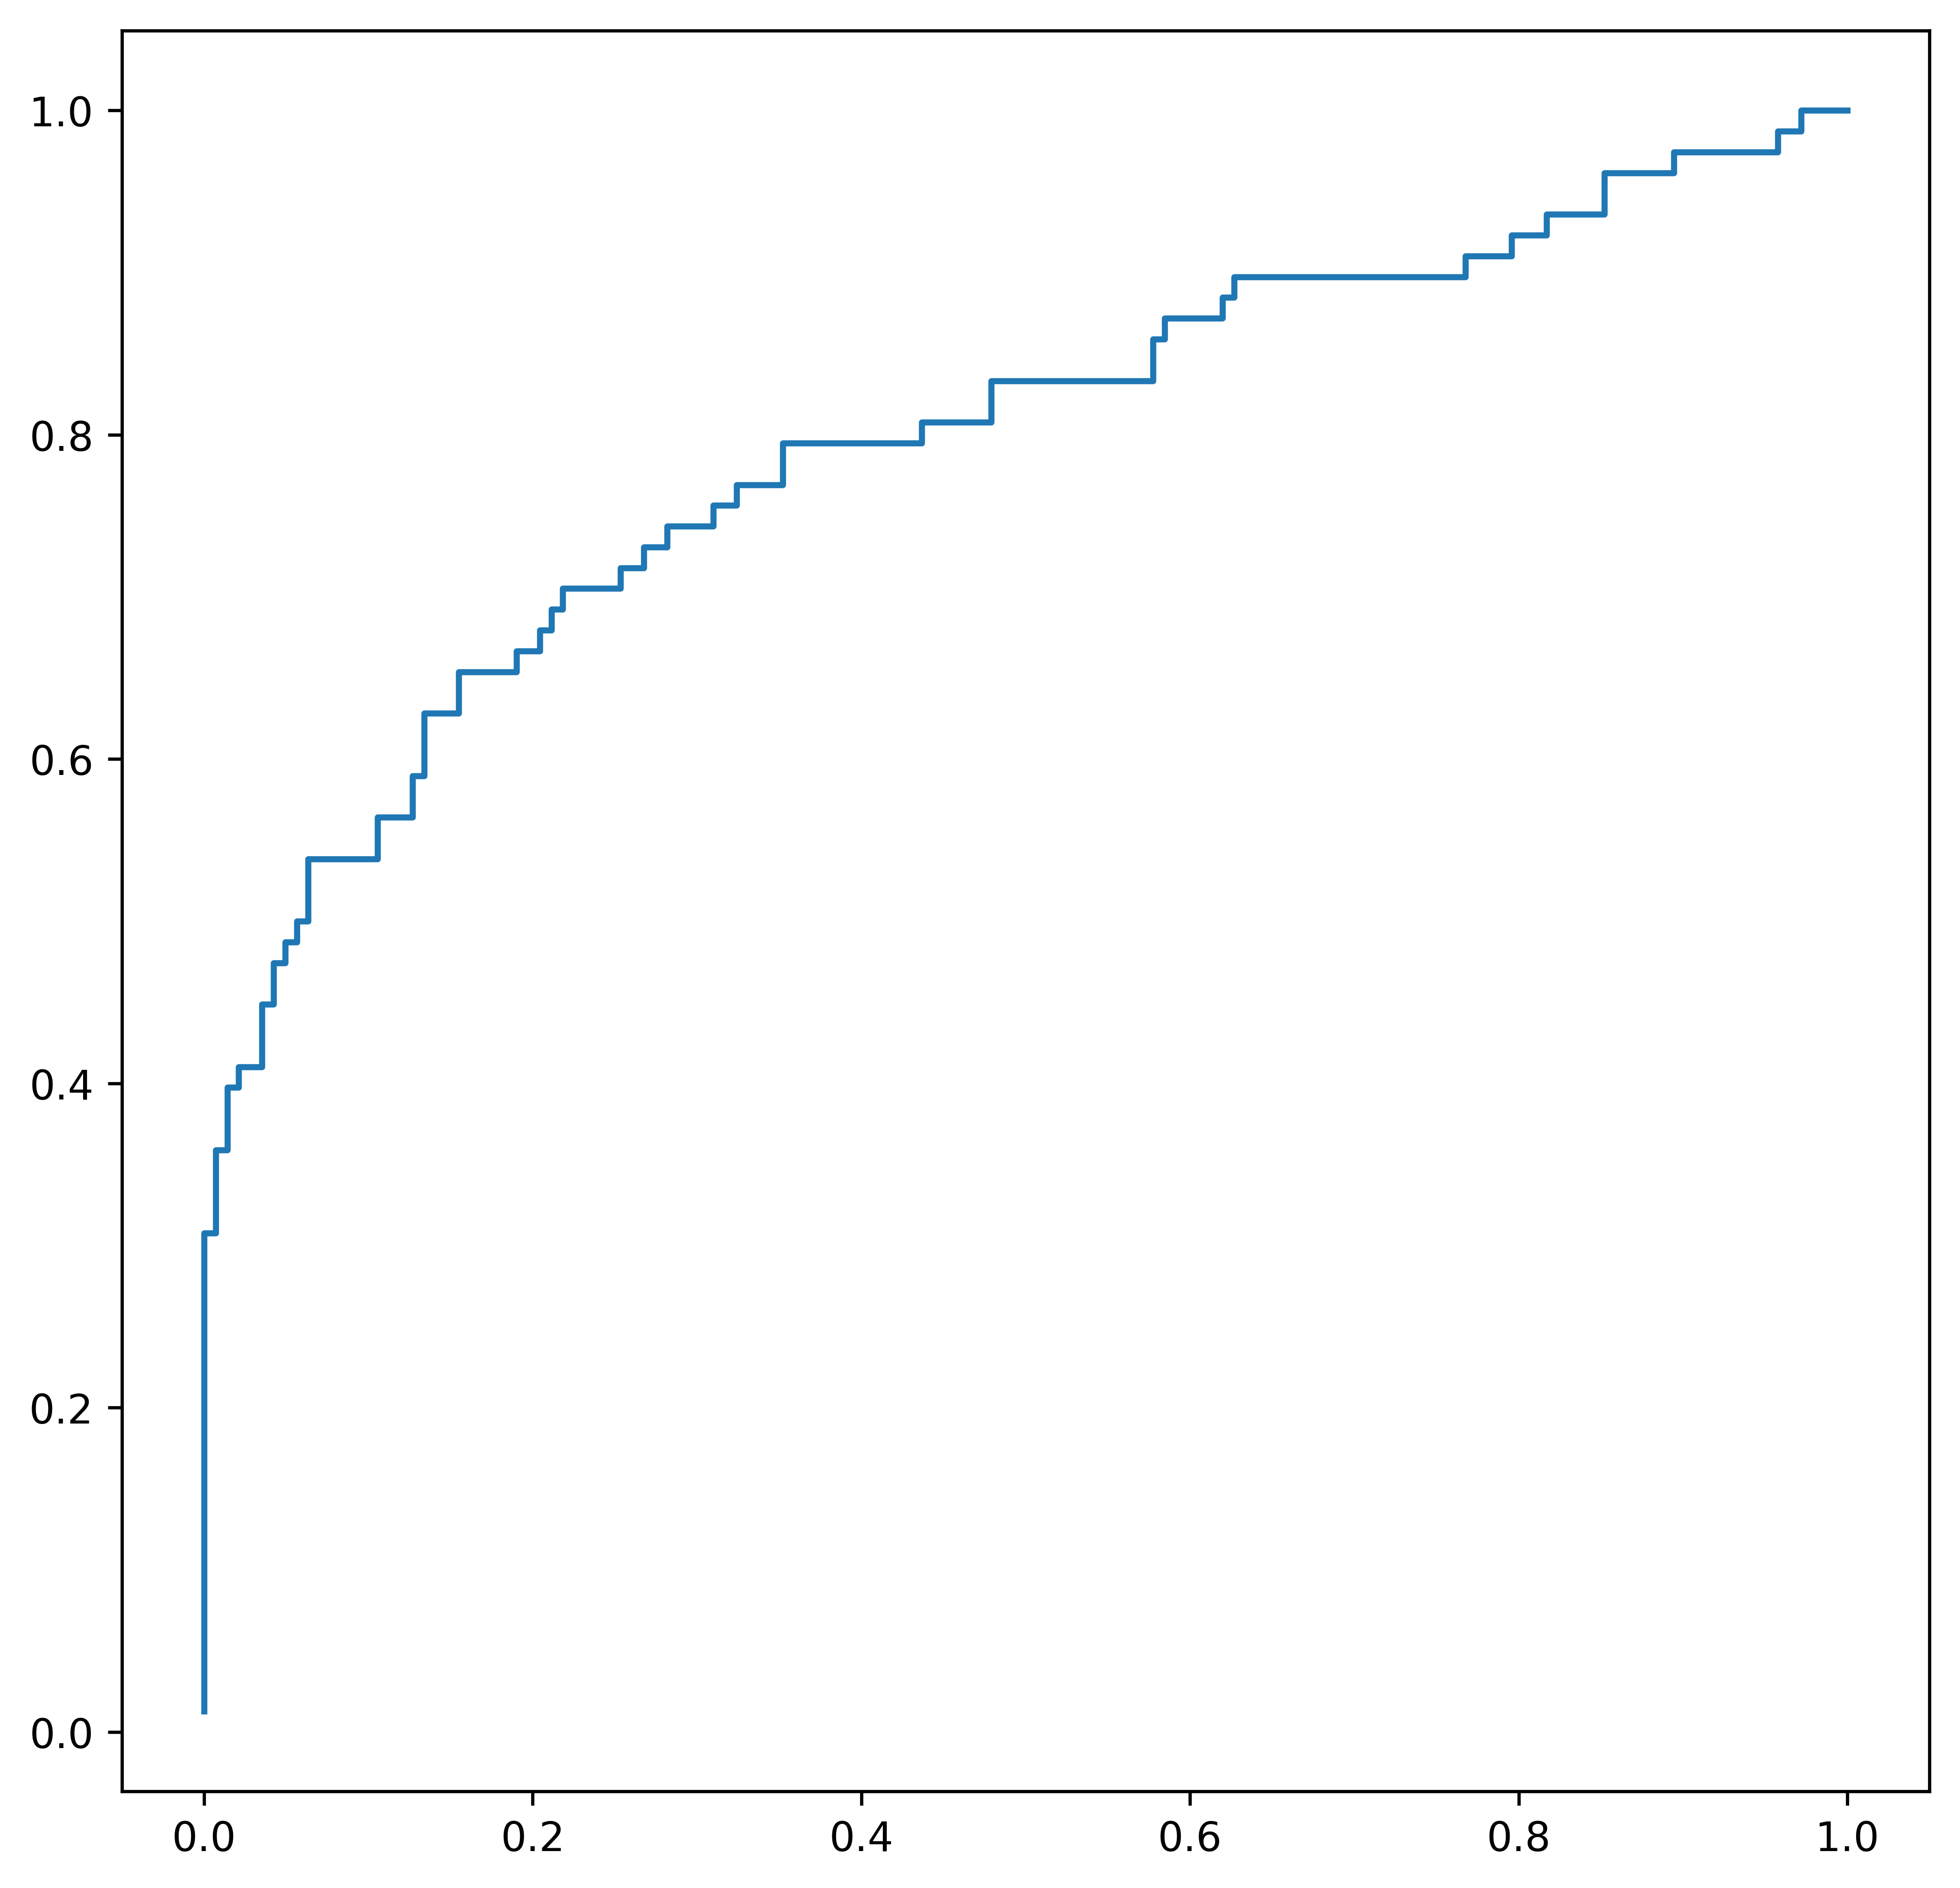

AUC: 0.794781509570242
ACC: 0.7863636363636364


array([[134,   8],
       [ 39,  39]])

In [26]:
predict = model.predict(train_features[1000:1220])

from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(train_labels[1000:1220], predict)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,8), dpi = 600)
plt.plot(fpr,tpr)
plt.show()
print('AUC:', roc_auc)
accuracy = metrics.accuracy_score(train_labels[1000:1220], predict.round())
print('ACC:', accuracy)
metrics.confusion_matrix(train_labels[1000:1220], predict.round())

In [27]:
import pandas as pd
roc = pd.DataFrame({'label': train_labels[1000:1220]})
roc.insert(loc=1, column='denoising', value=predict)

In [28]:
roc.to_csv("roc1.csv")